<a href="https://colab.research.google.com/github/riskakurniaa/Machine-Learning/blob/Jobsheet3/Praktikum2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : **Riska Kurnia Triwulandari**  
Kelas : **3A**  
NIM   : **2241720039**

## Mengimpor Library
Lakukan import library yang diperlukan terlebih dahulu, termasuk NumPy, Matplotlib, dan pandas.

In [1]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Mengimpor Dataset
Membaca dataset menggunakan pd.read_csv dan memilih fitur (variabel independen X) dan target (variabel dependen y).

In [2]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

*   **dataset.iloc[:, 1:2].values:** Mengambil kolom kedua dari dataset (menggunakan iloc) dan menyimpannya dalam X sebagai array NumPy. Ini berisi fitur yang akan digunakan untuk model.
*  **dataset.iloc[:, 2].values:** Mengambil kolom ketiga dari dataset (menggunakan iloc) dan menyimpannya dalam y sebagai array NumPy. Ini berisi target yang akan diprediksi.

## Feature Scaling
Menggunakan StandardScaler untuk melakukan penskalaan fitur X dan target y. Ini diperlukan karena SVM sangat sensitif terhadap skala data.

In [3]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

*   **StandardScaler():** Membuat objek StandardScaler untuk melakukan standardisasi data.
*   **sc_X.fit_transform(X.reshape(-1, 1)):** Menstandardisasi fitur X dengan cara meratakan bentuknya ke dua dimensi dan mengubah skala menjadi distribusi dengan rata-rata 0 dan deviasi standar 1.
*   **sc_y.fit_transform(y.reshape(-1, 1)):** Menstandardisasi target y dengan cara meratakan bentuknya ke dua dimensi dan mengubah skala menjadi distribusi dengan rata-rata 0 dan deviasi standar 1.


Standardisasi ini mengubah fitur dan target ke skala yang sama, yaitu dengan rata-rata 0 dan deviasi standar 1, yang penting untuk banyak algoritma pembelajaran mesin agar model berfungsi dengan baik.

## Fitting SVR ke Dataset
Lakukan pembuatan model SVR dengan kernel RBF (Radial Basis Function) dan melatihnya dengan data yang telah di-scaled.

In [4]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Model SVR dengan kernel RBF dilatih pada data yang telah distandardisasi untuk memprediksi target y berdasarkan fitur X. Kernel RBF membantu menangani hubungan non-linear antara fitur dan target.

## Visualisasi Hasil SVR

Lakukan visualisasi Menggunakan grafik untuk memvisualisasikan hasil prediksi model SVR. Ini mencakup plotting data asli (titik-titik merah) dan kurva hasil prediksi (garis biru) untuk tingkat posisi yang bervariasi.

<ipython-input-5-e94124bddd16>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


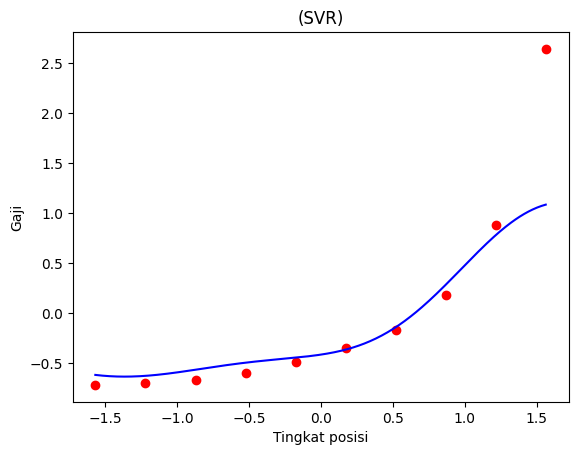

In [5]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('(SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()


## Prediksi Hasil

*   Membuat array 2D yang berisi tingkat posisi yang akan diprediksi. Dalam contoh ini, tingkat posisi 6.5.
*   Menskalakan fitur prediksi menggunakan sc_X.transform.
*   Melakukan prediksi menggunakan model SVR yang telah dilatih.
*   Mengembalikan hasil prediksi ke dalam skala aslinya menggunakan sc_y.inverse_transform.



In [6]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

Kode tersebut memprediksi gaji untuk tingkat posisi tertentu (6.5) dengan menggunakan model SVR. Tingkat posisi diskalakan sebelum prediksi, dan hasil prediksi kemudian dikembalikan ke skala asli untuk mendapatkan nilai gaji dalam satuan yang dapat dipahami.

## Menampilkan Hasil

Menampilkan hasil prediksi gaji untuk tingkat posisi 6.5 dalam kode

In [7]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


## Validasi Hasil

Hasil output Gambar 3.10 adalah grafik dari model Support Vector Regression (SVR) yang telah dilatih untuk memprediksi gaji berdasarkan tingkat posisi. Grafik tersebut merupakan visualisasi dari hubungan antara tingkat posisi (x-axis) dan gaji (y-axis) setelah menerapkan model SVR.

## Grafik SVR
*   Pada grafik tersebut, titik-titik merah mewakili data pengamatan asli yang digunakan untuk melatih model Support Vector Regression (SVR).
*   Garis biru adalah hasil dari prediksi model SVR. Garis ini mencoba untuk mengikuti pola data asli sebaik mungkin dan merupakan representasi dari hubungan non-linear antara tingkat posisi dan gaji.

Hasil prediksi yang ditampilkan adalah prediksi gaji untuk tingkat posisi 6.5. Hasilnya adalah sekitar
$170,370.02.

Ini berarti model SVR memperkirakan bahwa seseorang dengan tingkat posisi 6.5 akan memiliki gaji sekitar $170,370.02 berdasarkan pola hubungan yang ditemukan dalam data latihan.

Grafik ini memvisualisasikan bagaimana model SVR mencoba untuk menyesuaikan diri dengan data yang ada dan memberikan prediksi yang sesuai berdasarkan tingkat posisi yang diberikan (6.5 dalam hal ini). Dalam prakteknya, Anda dapat menggunakan model ini untuk membuat prediksi gaji berdasarkan tingkat posisi lainnya dengan mengganti nilai tingkat_posisi_prediksi.

## Evaluasi Model SVR

Langkah terakhir adalah melakukan evaluasi model meliputi MAE, MSE dan R-squared

In [9]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798



Kode tersebut mengevaluasi performa model regresi dengan empat metrik utama:


*   MAE (Mean Absolute Error): Mengukur rata-rata kesalahan absolut antara prediksi dan nilai asli.
*   MSE (Mean Squared Error): Menghitung rata-rata kuadrat kesalahan prediksi, memberikan penalti lebih besar untuk kesalahan besar.
*   RMSE (Root Mean Squared Error): Akar kuadrat dari MSE, menunjukkan skala kesalahan dalam satuan asli.
*   R² (R-squared): Menilai seberapa baik model menjelaskan variabilitas data target, dengan 1 sebagai nilai sempurna.